In [1]:
import pandas as pd
import matplotlib.pylab as plt

<ipython-input-1-6e3c7c03b0ee>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Download the data set
#function

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
#file path

file_path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [4]:
await download(file_path, "usedcars.csv")
file_name="usedcars.csv"

In [5]:
# Create a header

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [7]:
df = pd.read_csv(file_name, names = headers)

In [8]:
# display the first five rows of the dataframe.
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
# Identify missing values
# Convert "?" to NaN

import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
#Evaluating for Missing Data
#The missing values are converted by default. Use the following functions to identify these missing values. You can use two methods to detect missing data:

#.isnull()
#.notnull()
#The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [10]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
#Count missing values in each column

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

In [ ]:
#Deal with missing data
#How should you deal with missing data?

#Drop data
#a. Drop the whole row
#b. Drop the whole column
#Replace data
#a. Replace it by mean
#b. Replace it by frequency
#c. Replace it based on other functions

In [12]:
#Calculate the mean value for the "normalized-losses" column 

avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [13]:
# Replace "NaN" with mean value in "normalized-losses" column

df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

<ipython-input-13-6e3ffa44a52a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)


In [15]:
#All these methods avoid the chained assignment warning and should work effectively with the upcoming changes in pandas.
#df["normalized-losses"] = df["normalized-losses"].fillna(avg_norm_loss)
#df.loc[:, "normalized-losses"] = df["normalized-losses"].replace(np.nan, avg_norm_loss)
df["normalized-losses"] = df["normalized-losses"].replace(np.nan, avg_norm_loss)

In [16]:
#Calculate the mean value for the "bore" column

avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


In [17]:
# Replace "NaN" with the mean value in the "bore" column

df["bore"].replace(np.nan, avg_bore, inplace=True)

<ipython-input-17-c1e1a963fd04>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bore"].replace(np.nan, avg_bore, inplace=True)


In [18]:
#df["bore"] = df["bore"].fillna(avg_bore)
#df.loc[:, "bore"] = df["bore"].replace(np.nan, avg_bore)
df["bore"] = df["bore"].replace(np.nan, avg_bore)

In [ ]:
#Question #1

#replace NaN in "stroke" column with the mean value.

In [19]:
#Calculate the mean vaule for "stroke" column

avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

Average of stroke: 3.255422885572139


In [20]:
df["stroke"] = df["stroke"].replace(np.nan, avg_stroke)

In [21]:
#Calculate the mean value for the "horsepower" column

avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


In [23]:
#Replace "NaN" with the mean value in the "horsepower" column
df["horsepower"]=df["horsepower"].replace(np.nan, avg_horsepower)

<ipython-input-23-22d58da02413>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["horsepower"]=df["horsepower"].replace(np.nan, avg_horsepower)


In [24]:
df["horsepower"] = df["horsepower"].fillna(avg_horsepower)

In [25]:
#Calculate the mean value for "peak-rpm" column

avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


In [26]:
#Replace "NaN" with the mean value in the "peak-rpm" column

df["peak-rpm"] = df["peak-rpm"].fillna(avg_peakrpm)

In [27]:
# To see which values are present in a particular column, we can use the ".value_counts()" method:

df['num-of-doors'].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

In [28]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [29]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

<ipython-input-29-a63c47cb8800>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["num-of-doors"].replace(np.nan, "four", inplace=True)


In [30]:
#df["num-of-doors"] = df["num-of-doors"].fillna("four")

df["num-of-doors"] = df["num-of-doors"].replace(np.nan, "four")

#df.loc[:, "num-of-doors"] = df["num-of-doors"].replace(np.nan, "four")

In [31]:
# drop all rows that do not have price data:

# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)


In [32]:
# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [33]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,104.256158,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,104.256158,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,104.256158,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,104.256158,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,104.256158,5500,18,22,17450


In [34]:
# Correct data format
#Let's list the data types for each column

df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower           float64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [35]:
# Convert data types to proper format

df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [36]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [ ]:
# Data Standardization

#Use this formula for unit conversion:

#L/100km = 235 / mpg

df.head()




In [37]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,104.256158,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,104.256158,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,104.256158,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,104.256158,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,104.256158,5500.0,18,22,17450.0,13.055556


In [ ]:
#Question #2: 
#According to the example above, transform mpg to L/100km in the column of "highway-mpg" and change the name of column to "highway-L/100km".

In [38]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,104.256158,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,104.256158,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,104.256158,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,104.256158,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,104.256158,5500.0,18,10.681818,17450.0,13.055556


In [39]:
# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)


In [40]:
# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,104.256158,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,104.256158,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,104.256158,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,104.256158,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,104.256158,5500.0,18,10.681818,17450.0,13.055556


In [41]:
# Data Normalization


#To demonstrate normalization, say you want to scale the columns "length", "width" and "height".

#Target: normalize those variables so their value ranges from 0 to 1

#Approach: replace the original value by (original value)/(maximum value)

# replace (original value) by (original value)/(maximum value)

df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [42]:
# Question #3
#normalize the column "height"

df['height'] = df['height']/df['height'].max() 

# show the scaled columns
df[["length","width","height"]].head()


,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


In [43]:
# Binning
#Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
#In your data set, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if you only care about the price difference 
#between cars with high horsepower, medium horsepower, and little horsepower (3 types)? You can rearrange them into three ‘bins' to simplify analysis.

#Use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins.

df["horsepower"]=df["horsepower"].astype(int, copy=True)


Text(0.5, 1.0, 'horsepower bins')

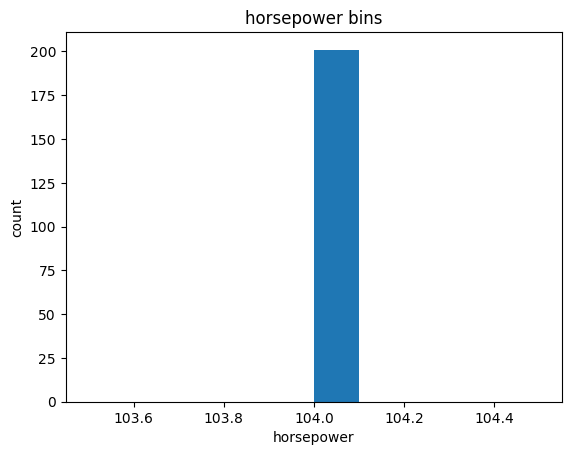

In [44]:
#Plot the histogram of horsepower to see the distribution of horsepower.

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [ ]:
#Find 3 bins of equal size bandwidth by using Numpy's linspace(start_value, end_value, numbers_generated function.

#Since you want to include the minimum value of horsepower, set start_value = min(df["horsepower"]).

#Since you want to include the maximum value of horsepower, set end_value = max(df["horsepower"]).

#Since you are building 3 bins of equal length, you need 4 dividers, so numbers_generated = 4.

#Build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.

In [52]:
# Build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.

bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([104., 104., 104., 104.])

In [60]:
import numpy as np
import pandas as pd

# Assuming df["horsepower"] is already cleaned and contains no NaN values
min_hp = df["horsepower"].min()
max_hp = df["horsepower"].max()

if min_hp == max_hp:
    # All values are the same, so create a single bin
    df['horsepower-binned'] = 'Single Value'
else:
    bins = np.linspace(min_hp, max_hp, 4)
    bins = np.unique(bins)
    df['horsepower-binned'] = pd.cut(df['horsepower'], bins=bins, labels=group_names, include_lowest=True)

# Display the result
df[['horsepower', 'horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,104,Single Value
1,104,Single Value
2,104,Single Value
3,104,Single Value
4,104,Single Value
5,104,Single Value
6,104,Single Value
7,104,Single Value
8,104,Single Value
9,104,Single Value


In [61]:
#See the number of vehicles in each bin:
df["horsepower-binned"].value_counts()

horsepower-binned
Single Value    201
Name: count, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

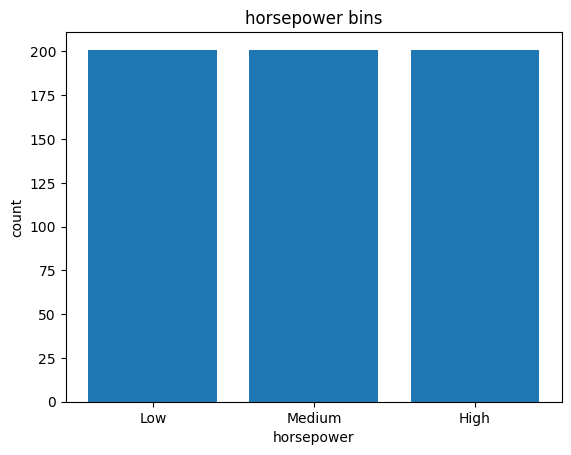

In [62]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

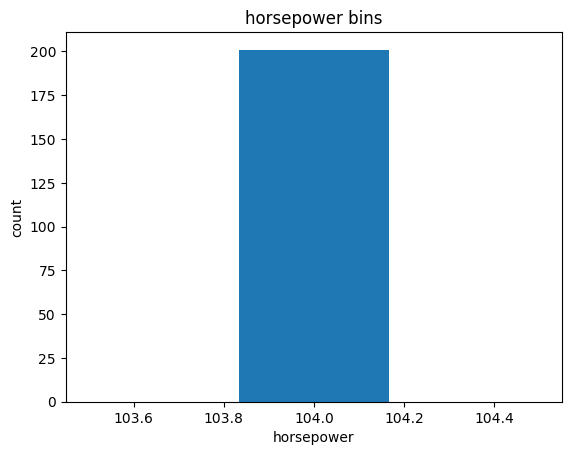

In [63]:
#Bins Visualization
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [64]:
# Indicator Variable
#An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.


df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [65]:
# Get the indicator variables and assign it to data frame "dummy_variable_1":

dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [66]:
# Change the column names for clarity:

dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [67]:
#In the data frame, column 'fuel-type' now has values for 'gas' and 'diesel' as 0s and 1s.

# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)


In [68]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,104,5000.0,21,8.703704,13495.0,11.190476,Single Value,False,True
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,104,5000.0,21,8.703704,16500.0,11.190476,Single Value,False,True
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,104,5000.0,19,9.038462,16500.0,12.368421,Single Value,False,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,104,5500.0,24,7.833333,13950.0,9.791667,Single Value,False,True
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,104,5500.0,18,10.681818,17450.0,13.055556,Single Value,False,True


In [70]:
#Question #4:
# create an indicator variable for the column "aspiration"

# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()


,aspiration-std,aspiration-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [72]:
import pandas as pd

# Create indicator variables for the column 'aspiration'
dummy_variable_2 = pd.get_dummies(df['aspiration'], prefix='aspiration')

# Rename columns for clarity if necessary
# This renaming assumes the original values were 'std' and 'turbo'
dummy_variable_2.rename(columns={'aspiration_std': 'aspiration-std', 'aspiration_turbo': 'aspiration-turbo'}, inplace=True)

# Show the first 5 instances of the data frame "dummy_variable_2"
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [ ]:
Question #5: 
#Merge the new dataframe to the original dataframe, then drop the column 'aspiration'.

In [73]:
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)